# Based upon the requriment correct model = 1) DecisionTreeClassifier  2) Logistic Regression

# Import the necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Load the Dataset

In [2]:
df = pd.read_csv("loan_approval_data.csv")

In [3]:
df

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,997.0,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


# Missing Value Handeling

In [4]:
categorical_cols = df.select_dtypes(include = ["object"]).columns
numerical_cols = df.select_dtypes(include = ["number"]).columns # number can be include float32, float64, int 32, 64 etc

In [5]:
# Numerical values handeing
num_imp = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

# Categical values handelilng
cat_imp = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [6]:
# Ensure that all values are filled or not
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA - Exploratory Data Analysis

In [7]:
# Cheaking the Class Distribution
classes_count = df["Loan_Approved"].value_counts()

## Class Wise Distribution

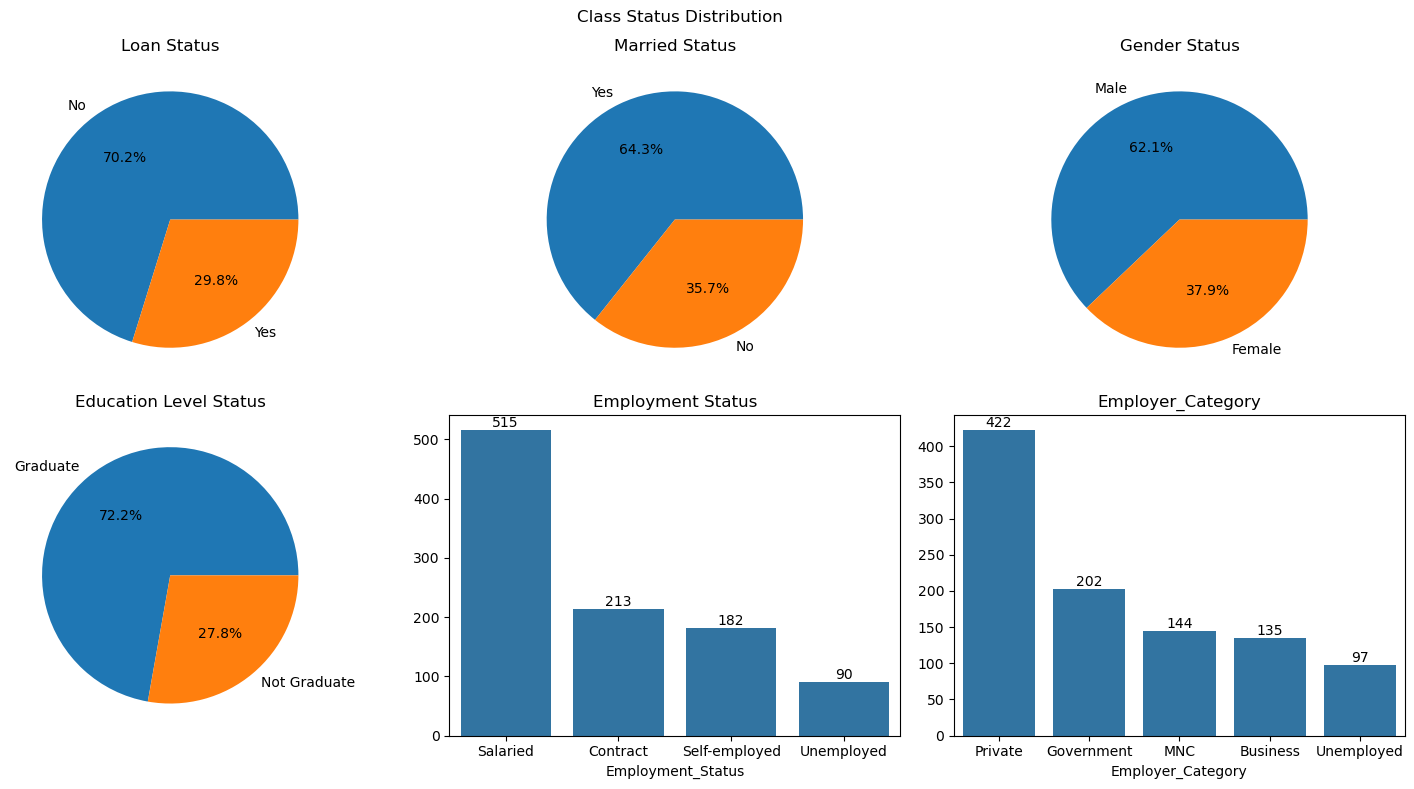

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))

axes[0, 0].pie(classes_count, labels = ["No", "Yes"], autopct = "%1.1f%%")
axes[0, 0].set_title("Loan Status")

married_stauts = df["Marital_Status"].value_counts()
axes[0, 1].pie(married_stauts, labels = ["Yes", "No"], autopct = "%1.1f%%")
axes[0, 1].set_title("Married Status")

gen_stauts = df["Gender"].value_counts()
axes[0, 2].pie(gen_stauts, labels = ["Male", "Female"], autopct = "%1.1f%%")
axes[0, 2].set_title("Gender Status")

educate_cnt = df["Education_Level"].value_counts()
axes[1, 0].pie(educate_cnt, labels = ["Graduate", "Not Graduate"], autopct = "%1.1f%%")
axes[1, 0].set_title("Education Level Status")

emp_cnt = df["Employment_Status"].value_counts()
sns.barplot(
    x=emp_cnt.index,
    y=emp_cnt.values,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Employment Status")
axes[1, 1].bar_label(axes[1, 1].containers[0])

emp_cat_cnt = df["Employer_Category"].value_counts()
sns.barplot(
    x = emp_cat_cnt.index,
    y = emp_cat_cnt.values,
    ax = axes[1, 2]
)
axes[1, 2].set_title("Employer_Category")
axes[1, 2].bar_label(axes[1, 2].containers[0])

fig.suptitle("Class Status Distribution")
fig.tight_layout()

Text(0.5, 0.98, 'Graduate and Non Graduate Loan Approvales')

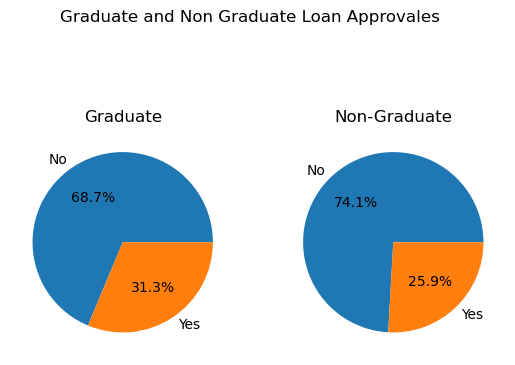

In [9]:
data = df.groupby(["Education_Level", "Loan_Approved"])["Applicant_ID"].count()
data

# Pie chart for the graduates 
fig, axes = plt.subplots(1, 2)

axes[0].pie([496, 226], labels = ["No", "Yes"], autopct = "%1.1f%%")
axes[0].set_title("Graduate")

axes[1].pie([206, 72], labels = ["No", "Yes"], autopct = "%1.1f%%")
axes[1].set_title("Non-Graduate")

fig.suptitle("Graduate and Non Graduate Loan Approvales")

  Education_Level Loan_Approved  Count
0        Graduate            No    496
1        Graduate           Yes    226
2    Not Graduate            No    206
3    Not Graduate           Yes     72
  Marital_Status Loan_Approved  Count
0        Married            No    458
1        Married           Yes    185
2         Single            No    244
3         Single           Yes    113
    Existing_Loans Loan_Approved  Count
0         0.000000            No    124
1         0.000000           Yes     63
2         1.000000            No    154
3         1.000000           Yes     64
4         1.950526            No     39
5         1.950526           Yes     11
6         2.000000            No    127
7         2.000000           Yes     57
8         3.000000            No    125
9         3.000000           Yes     52
10        4.000000            No    133
11        4.000000           Yes     51


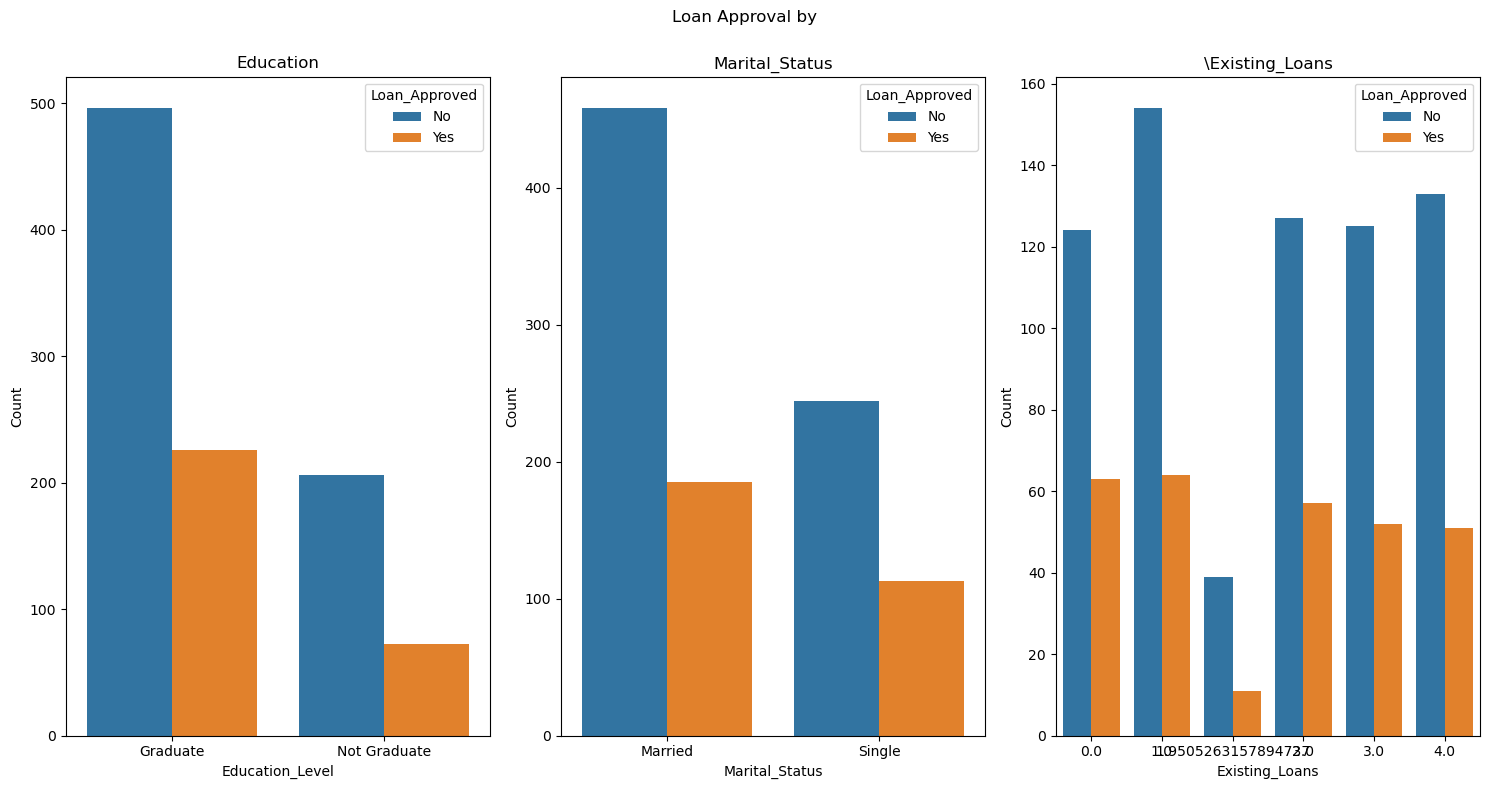

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (15, 8))

# Loan Approval by the Education_Level
plot_data = (
    df.groupby(["Education_Level", "Loan_Approved"])
      .size()
      .reset_index(name="Count")
)
print(plot_data)

sns.barplot(
    ax = axes[0],
    data=plot_data,
    x="Education_Level",
    y="Count",
    hue="Loan_Approved"
)

axes[0].set_title("\nEducation")

# Loan Approved by the Martial_Stuatus
plot_data = (
    df.groupby(["Marital_Status", "Loan_Approved"])
      .size()
      .reset_index(name="Count")
)
print(plot_data)

sns.barplot(
    ax = axes[1],
    data=plot_data,
    x="Marital_Status",
    y="Count",
    hue="Loan_Approved"
)
axes[1].set_title("\nMarital_Status")

# Loan Approval by the Existing_Loans
plot_data = (
    df.groupby(["Existing_Loans", "Loan_Approved"])
      .size()
      .reset_index(name="Count")
)
print(plot_data)

sns.barplot(
    ax = axes[2],
    data=plot_data,
    x="Existing_Loans",
    y="Count",
    hue="Loan_Approved"
)
axes[2].set_title("\Existing_Loans")

fig.suptitle("Loan Approval by")
fig.tight_layout()

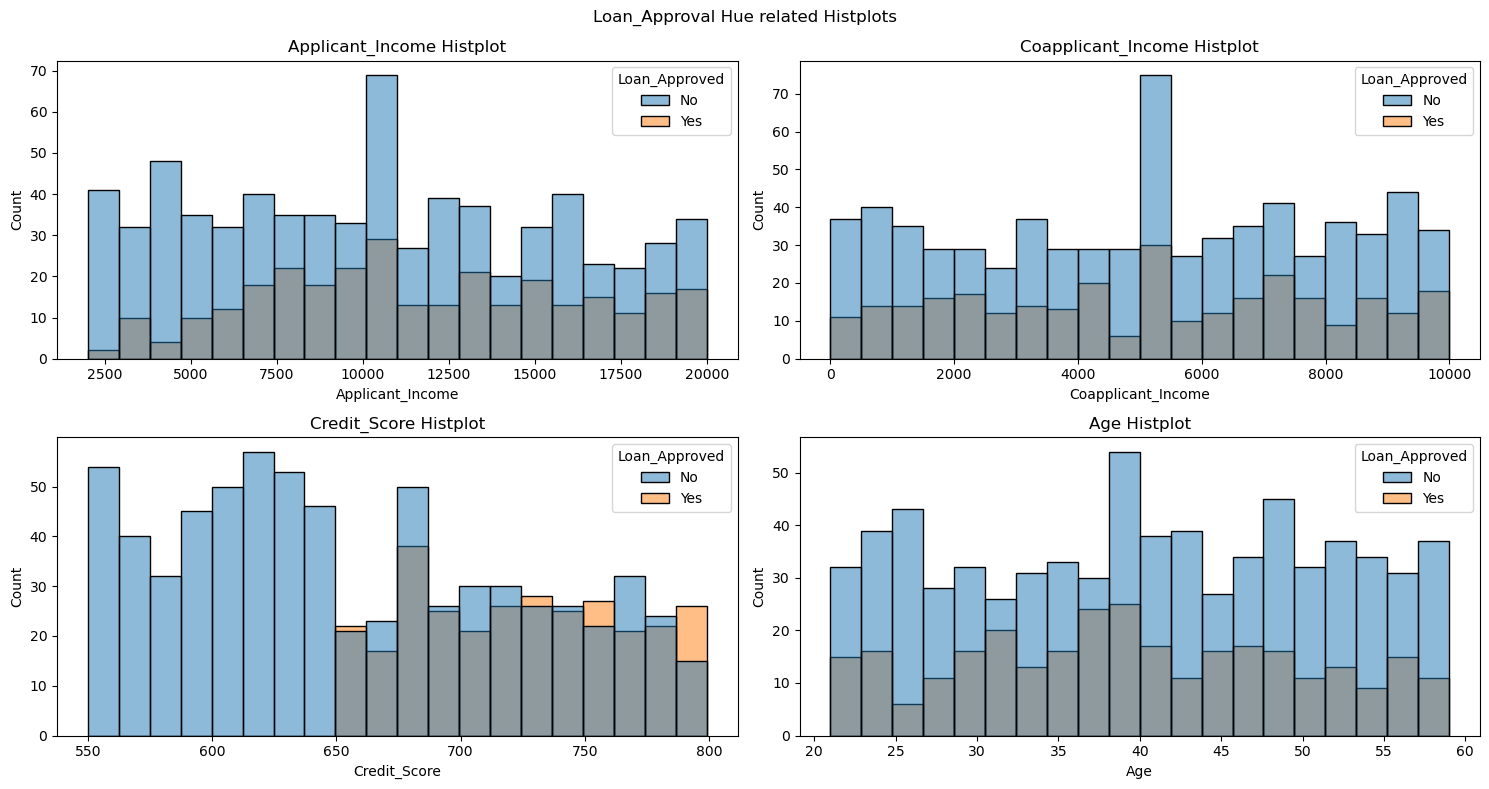

In [11]:
# Track the number of employees of the their salary values
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

sns.histplot(
    ax = axes[0, 0],
    data = df,
    x = "Applicant_Income",
    bins = 20,
    hue = "Loan_Approved"
)
axes[0, 0].set_title("Applicant_Income Histplot")

sns.histplot(
    ax = axes[0, 1],
    data = df,
    x = "Coapplicant_Income",
    bins = 20,
    hue = "Loan_Approved"
)
axes[0, 1].set_title("Coapplicant_Income Histplot")

sns.histplot(
    ax = axes[1, 0],
    data = df,
    x = "Credit_Score",
    bins = 20,
    hue = "Loan_Approved"
)
axes[1, 0].set_title("Credit_Score Histplot")

sns.histplot(
    ax = axes[1, 1],
    data = df,
    x = "Age",
    bins = 20,
    hue = "Loan_Approved"
)
axes[1, 1].set_title("Age Histplot")

fig.suptitle("Loan_Approval Hue related Histplots")
fig.tight_layout()

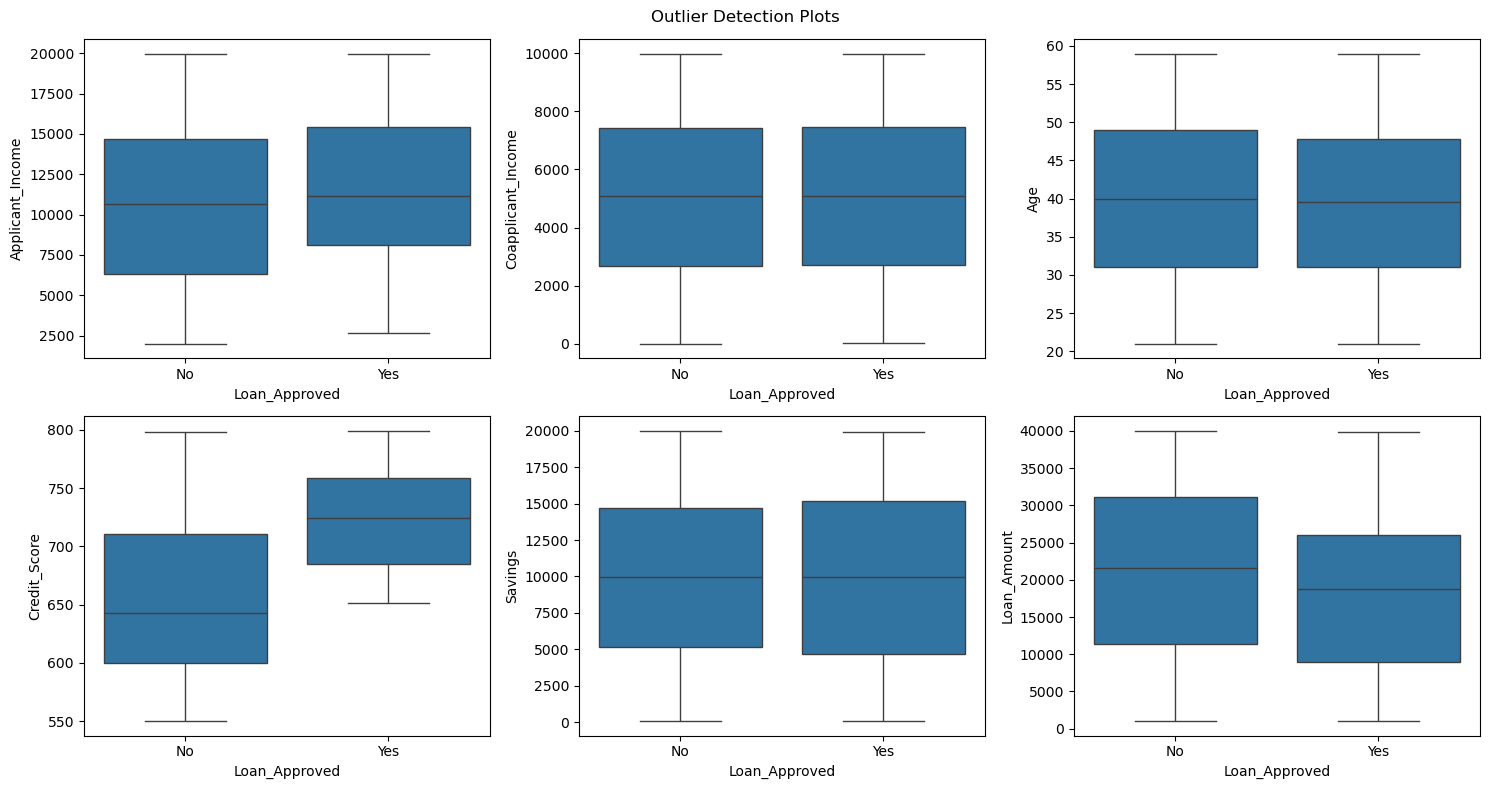

In [12]:
# To detact the outliers 

fig, axes = plt.subplots(2, 3, figsize = (15, 8))

sns.boxplot(
    ax = axes[0, 0],
    data = df,
    x = "Loan_Approved",
    y = "Applicant_Income"
)

sns.boxplot(
    ax = axes[0, 1],
    data = df,
    x = "Loan_Approved",
    y = "Coapplicant_Income"
)

sns.boxplot(
    ax = axes[0, 2],
    data = df,
    x = "Loan_Approved",
    y = "Age"
)

sns.boxplot(
    ax = axes[1, 0],
    data = df,
    x = "Loan_Approved",
    y = "Credit_Score"
)

sns.boxplot(
    ax = axes[1, 1],
    data = df,
    x = "Loan_Approved",
    y = "Savings"
)

sns.boxplot(
    ax = axes[1, 2],
    data = df,
    x = "Loan_Approved",
    y = "Loan_Amount"
)

fig.suptitle("Outlier Detection Plots")
fig.tight_layout()

# Corelation Matrix and Heatmaps

In [13]:
# Label Encoding - This is for to indicated the priority of the columns values 
le = LabelEncoder()
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])
df["Marital_Status"] = le.fit_transform(df["Marital_Status"])
df["Education_Level"] = le.fit_transform(df["Education_Level"])

In [14]:
num_data = df.select_dtypes(include = ["number"])
corr_matrix = num_data.corr()
corr_matrix["Loan_Approved"].sort_values(ascending = False)

Loan_Approved         1.000000
Credit_Score          0.451175
Applicant_Income      0.119796
Marital_Status        0.030182
Collateral_Value      0.021868
Coapplicant_Income    0.004230
Applicant_ID         -0.011167
Savings              -0.013437
Age                  -0.022343
Dependents           -0.023811
Existing_Loans       -0.034794
Education_Level      -0.052920
Loan_Term            -0.086644
Loan_Amount          -0.126499
DTI_Ratio            -0.444783
Name: Loan_Approved, dtype: float64

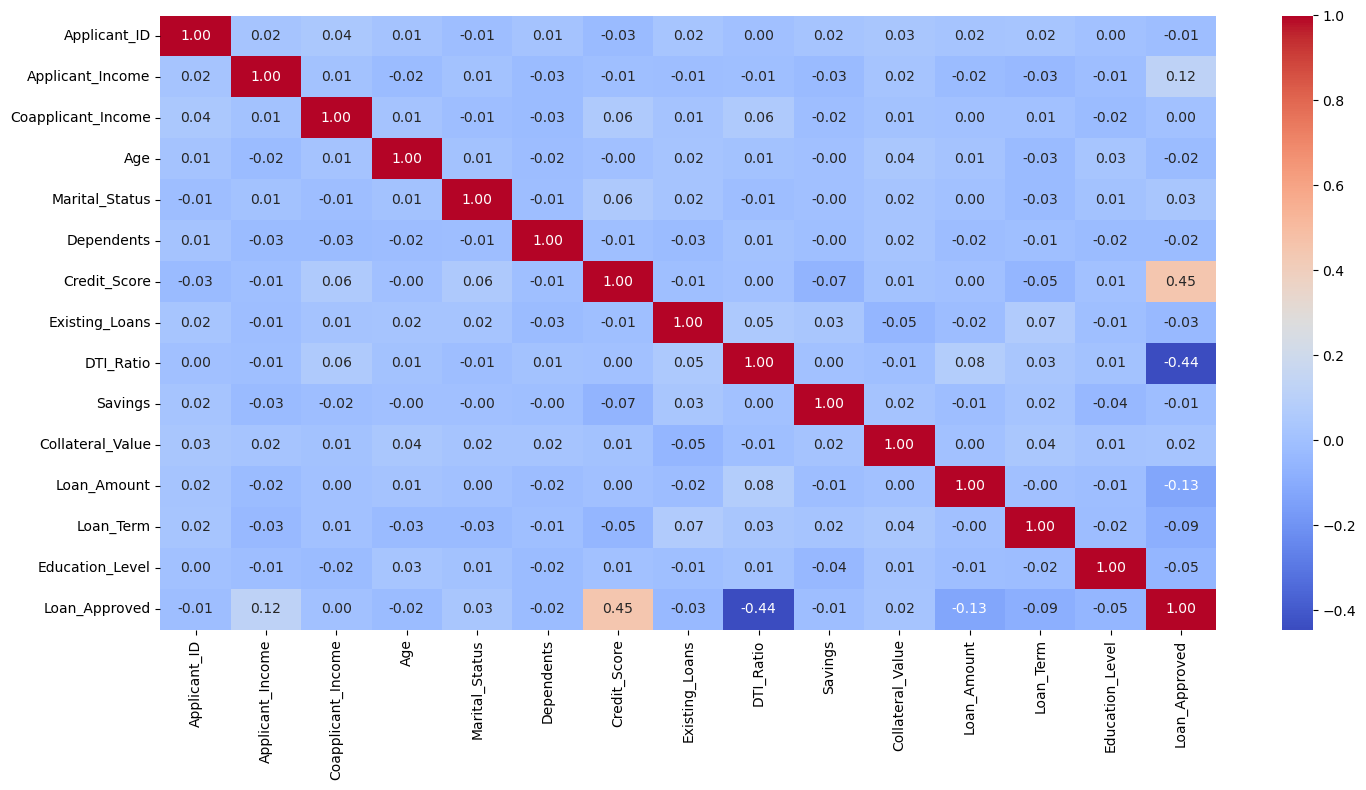

In [15]:
# Heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(
    corr_matrix,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
)
plt.tight_layout()

In [16]:
# OneHotEncoding 
cols = ["Employment_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop = "first", sparse_output = False, handle_unknown = "ignore")
encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns = ohe.get_feature_names_out(cols), index = df.index)

# Now concatinating the final dataframe
df = pd.concat([df.drop(columns = cols), encoded_df], axis = 1)

In [17]:
df = df.drop(columns = ["Applicant_ID"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Marital_Status                   1000 non-null   int64  
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

## Feature Scalling

In [18]:
# X and Y evaluation
X = df.drop(columns = ["Loan_Approved"])
y = df["Loan_Approved"]

In [19]:
# Train - Test - Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

## Train & Evaluate Models

### 1) Naive Bayes 

In [20]:
# Scalling the Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.865
Precision :  0.8035714285714286
Recall :  0.7377049180327869
F1 Score :  0.7692307692307693
[[128  11]
 [ 16  45]]


### 2) Logistic Regression

In [22]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.865
Precision :  0.7833333333333333
Recall :  0.7704918032786885
F1 Score :  0.7768595041322314
[[126  13]
 [ 14  47]]


### 3) KNN Model

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

### - Cross Validation

In [24]:
param_grid = {"n_neighbors": [5, 7, 9, 11, 13]}
classifier = KNeighborsClassifier()

knn_cv_model = GridSearchCV(
    classifier, 
    param_grid,
    cv = 5,
    scoring = "precision"
)

knn_cv_model.fit(X_train_scaled, y_train)

y_pred = knn_cv_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

# Fetch the Report and Find the Best N values
print("\nCross Validation Report average performance : \n", pd.DataFrame(knn_cv_model.cv_results_)["mean_test_score"])
print("\nBest K value = ", knn_cv_model.best_params_)

Accuracy :  0.79
Precision :  0.7317073170731707
Recall :  0.4918032786885246
F1 Score :  0.5882352941176471
[[128  11]
 [ 31  30]]

Cross Validation Report average performance : 
 0    0.649932
1    0.684940
2    0.704767
3    0.679111
4    0.721080
Name: mean_test_score, dtype: float64

Best K value =  {'n_neighbors': 13}


### Pipline + CorssValidation

In [25]:
# First the train_test_split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])
param_grid = {"knn__n_neighbors": [5, 7, 9, 11, 13]}

knn_cv_model = GridSearchCV(
    pipe, 
    param_grid,
    cv = 5,
    scoring = "precision"
)

knn_cv_model.fit(X_train_scaled, y_train)

y_pred = knn_cv_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

# Fetch the Report and Find the Best N values
print("\nCross Validation Report average performance : \n", pd.DataFrame(knn_cv_model.cv_results_)["mean_test_score"])
print("\nBest K value = ", knn_cv_model.best_params_)

Accuracy :  0.79
Precision :  0.7317073170731707
Recall :  0.4918032786885246
F1 Score :  0.5882352941176471
[[128  11]
 [ 31  30]]

Cross Validation Report average performance : 
 0    0.647031
1    0.682842
2    0.695331
3    0.675415
4    0.699041
Name: mean_test_score, dtype: float64

Best K value =  {'knn__n_neighbors': 13}


# Feature Engineering

In [26]:
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# IF SOME CASE OVER DATA IS LEFT OR RIGHT THAT CASE WE CAN TRY TO DECREASE OVER DATA IMPACT ON OVER MODEL that case we can take a log
# x = log(1 + x) here add 1 for to prevent the log(0) condition
df["Applicant_Income_log1p"] = np.log1p(df["Applicant_Income"])

In [27]:
X = df.drop(columns = ["DTI_Ratio", "Credit_Score", "Applicant_Income", "Loan_Approved"])
y = df["Loan_Approved"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [29]:
# Scalling the Variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.87
Precision :  0.7777777777777778
Recall :  0.8032786885245902
F1 Score :  0.7903225806451613
[[125  14]
 [ 12  49]]


In [31]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.865
Precision :  0.8035714285714286
Recall :  0.7377049180327869
F1 Score :  0.7692307692307693
[[128  11]
 [ 16  45]]


In [32]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.765
Precision :  0.6590909090909091
Recall :  0.47540983606557374
F1 Score :  0.5523809523809524
[[124  15]
 [ 32  29]]


# DecisionTreeClassifier

In [33]:
tree_model = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_split = 8,
    random_state = 42
)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=8, random_state=42)

In [34]:
# Evaluatet the model 
y_pred = tree_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.91
Precision :  0.7945205479452054
Recall :  0.9508196721311475
F1 Score :  0.8656716417910447
[[124  15]
 [  3  58]]


## Hyperparameter Tuning - DecisionTreeClassifier

In [35]:
pipe = Pipeline([ 
    ('dt', DecisionTreeClassifier())
])

param_grid = {
    "dt__max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "dt__min_samples_split": [5, 8, 10, 15, 20, 25, 30, 35]
}

single_tree_cv_model = GridSearchCV(
    pipe, 
    param_grid,
    cv = 5,
    scoring = "precision"
)

single_tree_cv_model.fit(X_train_scaled, y_train)

y_pred = single_tree_cv_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.89
Precision :  0.819672131147541
Recall :  0.819672131147541
F1 Score :  0.819672131147541
[[128  11]
 [ 11  50]]


# Random Forest Classifier

In [36]:
rf = RandomForestClassifier(
    n_estimators = 101,
    max_depth = 4,
    min_samples_split = 10,
    random_state = 42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=101,
                       random_state=42)

In [37]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

Accuracy :  0.845
Precision :  0.8
Recall :  0.6557377049180327
F1 Score :  0.7207207207207207
[[129  10]
 [ 21  40]]


## Hyperparameter Tuning - RandomForestClassifier

In [38]:
pipe = Pipeline([ 
    ('rf', RandomForestClassifier())
])

param_grid = {
    "rf__n_estimators": [101, 151, 201, 251, 301, 401],
    "rf__max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "rf__min_samples_split": [5, 8, 10, 15, 20, 25, 30, 35]
}

rf_cv_model = GridSearchCV(
    pipe, 
    param_grid,
    cv = 5,
    scoring = "precision"
)

rf_cv_model.fit(X_train_scaled, y_train)

y_pred = rf_cv_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy : ", acc)
print("Precision : ", pre)
print("Recall : ", rec)
print("F1 Score : ", f1)
print(cm)

C:\Users\jashs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy :  0.82
Precision :  0.8378378378378378
Recall :  0.5081967213114754
F1 Score :  0.6326530612244898
[[133   6]
 [ 30  31]]
